### Определение перспективного тарифа для телеком-компании.

### План проекта
 
1.[Открыть файл с данными и изучить общую информацию](#cell1)

2.[Подготовка данных](#cell2)

3.[Анализ данных](#cell3)

4.[Проверка гипотез](#cell4)

5.[Общий вывод](#cell5)

### Открыть файл с данными и изучить общую информацию
<a id='cell1'></a>

5.1 Импортировал библиотеку pandas, matplotlib.pyplot, numpy, stats.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

5.2 Прочитал содержимое файлов calls.csv, internet.csv, messages.csv, tariffs.csv, users.csv и сохранил их в переменных calls_df, internet_df, messages_df, tariffs_df, users_df.

In [2]:
calls_df = pd.read_csv('/datasets/calls.csv')
internet_df = pd.read_csv('/datasets/internet.csv')
messages_df = pd.read_csv('/datasets/messages.csv')
tariffs_df = pd.read_csv('/datasets/tariffs.csv')
users_df = pd.read_csv('/datasets/users.csv')

5.3 Ознакомился с информацией в таблицах, вызвав методы info(), head(), describe().
* Таблица calls_df.

In [3]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls_df.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
calls_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,202607,202607,1404_160,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
call_date,202607,365,2018-12-31,1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,202607,NaN,NaN,NaN,6.75589,5.84337,0,1.3,6,10.7,38
user_id,202607,NaN,NaN,NaN,1253.94,144.723,1000,1126,1260,1379,1499


* Таблица internet_df.

In [6]:
internet_df.info()
internet_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
internet_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396,NaN,NaN,NaN,74697.5,43127.1,0,37348.8,74697.5,112046,149395
id,149396,149396,1310_82,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mb_used,149396,NaN,NaN,NaN,370.192,278.301,0,138.188,348.015,559.553,1724.83
session_date,149396,365,2018-12-31,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,149396,NaN,NaN,NaN,1252.1,144.051,1000,1130,1251,1380,1499


* Таблица messages_df.

In [8]:
messages_df.info()
messages_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
messages_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,123036,123036,1396_96,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
message_date,123036,364,2018-12-31,859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,123036,NaN,NaN,NaN,1256.99,143.524,1000,1134,1271,1381,1499


* Таблица tariffs_df.

In [10]:
tariffs_df.info()
tariffs_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
internet_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396,NaN,NaN,NaN,74697.5,43127.1,0,37348.8,74697.5,112046,149395
id,149396,149396,1310_82,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mb_used,149396,NaN,NaN,NaN,370.192,278.301,0,138.188,348.015,559.553,1724.83
session_date,149396,365,2018-12-31,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,149396,NaN,NaN,NaN,1252.1,144.051,1000,1130,1251,1380,1499


In [12]:
users_df.info()
users_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [13]:
users_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,500,NaN,NaN,NaN,1249.5,144.482,1000,1124.75,1249.5,1374.25,1499
age,500,NaN,NaN,NaN,46.588,16.6676,18,32,46,62,75
churn_date,38,33,2018-12-03,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,500,76,Москва,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_name,500,246,Радим,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_name,500,419,Андреенко,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reg_date,500,270,2018-05-28,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tariff,500,2,smart,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вывод: в предоставленных датафреймах нету проблем с дубликатами или большим количеством пропусков(в данных мало мусора), есть необходимость изменить тип данных в столбцах связанных с датой.

### Подготовка данных
<a id='cell2'></a>

6.1 Изменил тип данных связанный с датой в столбцах call_date, session_date, message_date, reg_date, churn_date.

In [14]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%dT%H:%M:%S')
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%dT%H:%M:%S')
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%dT%H:%M:%S')
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%dT%H:%M:%S')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%dT%H:%M:%S')

6.2 Проверил наличие пропусков в таблицах методами isnull().sum().

In [15]:
calls_df.isnull().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [16]:
internet_df.isnull().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [17]:
messages_df.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [18]:
users_df.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

6.3 Пропущенные значения в столбце 'churn_date' датафрейма users_df заменил методом fillna(). Пропуск означает, что тариф еще действует. 

In [19]:
users_df['churn_date'] = users_df['churn_date'].fillna('действителен')
users_df.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,действителен,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,действителен,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,действителен,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,действителен,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,действителен,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,действителен,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,действителен,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,действителен,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,действителен,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,действителен,Пермь,Василиса,Блинова,2018-03-22,smart


Посчитайте для каждого пользователя:
1. количество сделанных звонков и израсходованных минут разговора по месяцам;
2. количество отправленных сообщений по месяцам;
3. объем израсходованного интернет-трафика по месяцам;
4. помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-* трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

1. количество сделанных звонков и израсходованных минут разговора по месяцам

6.4 Добавил в датасет calls_df столбец 'month'. Округлил вверх значения столбца 'duration' методом round(), чтобы значения столбца округлились как требует того условие задания, то я прибавил 0.5.

In [20]:
calls_df['month'] = calls_df['call_date'].dt.month
calls_df['duration'] = (calls_df['duration'] + 0.5).round(0)
calls_df.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


6.5 Посчитал время разговора и количество звонков по месяцам, применяя pivot_table(). Переименовал столбцы 'count' и 'sum' методом rename(). В дальнейшем, а точнее в пункте 7,в датафреймах calls_df_month, messages_df_month, internet_df_month, после их окончательной компановки, столбцы датафреймов будут переименованы.

In [21]:
calls_df_month = calls_df.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['count', 'sum']).reset_index()
calls_df_month.rename(columns={'count': 'calls'}, inplace=True)
calls_df_month.rename(columns={'sum': 'minutes'}, inplace=True)
calls_df_month.head(10)

,user_id,month,calls,minutes
,,,duration,duration
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,409.0
4,1000,9,58,467.0
5,1000,10,57,350.0
6,1000,11,43,338.0
7,1000,12,46,333.0
8,1001,11,59,430.0


2. количество отправленных сообщений по месяцам;

6.7 Добавил в татасет messages_df столбец 'month'.

In [22]:
messages_df['month'] = messages_df['message_date'].dt.month

6.8 Посчитал количество отправленных сообщений по месяцам применяя pivot_table().

In [23]:
messages_df_month = messages_df.pivot_table(index = ['user_id', 'month'], aggfunc = 'count').reset_index()
messages_df_month.head(10)

,user_id,month,id,message_date
0,1000,5,22,22
1,1000,6,60,60
2,1000,7,75,75
3,1000,8,81,81
4,1000,9,57,57
5,1000,10,73,73
6,1000,11,58,58
7,1000,12,70,70
8,1002,6,4,4
9,1002,7,11,11


3. объем израсходованного интернет-трафика по месяцам.

6.8 Добавил в датасет Internet_df столбец 'month'. Округлил вверх значения столбца 'mb_used' методом round(), чтобы значения столбца округлились как требует того условие задания, то я прибавил 0.5.

In [24]:
internet_df['month'] = internet_df['session_date'].dt.month
internet_df['mb_used'] = (internet_df['mb_used']+ 0.5).round(0) 
internet_df.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113.0,2018-11-25,1000,11
1,1,1000_1,1053.0,2018-09-07,1000,9
2,2,1000_2,1198.0,2018-06-25,1000,6
3,3,1000_3,551.0,2018-08-22,1000,8
4,4,1000_4,303.0,2018-09-24,1000,9
5,5,1000_5,400.0,2018-10-02,1000,10
6,6,1000_6,541.0,2018-09-07,1000,9
7,7,1000_7,416.0,2018-07-11,1000,7
8,8,1000_8,506.0,2018-10-08,1000,10
9,9,1000_9,346.0,2018-09-03,1000,9


6.8 Посчитал объем израсходованного интернет-трафика по месяцам применяя pivot_table(). Переименовал столбец 'sum' на 'mb_used_month' методом rename.

In [25]:
internet_df_month = internet_df.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = ['sum']).reset_index()
internet_df_month.rename(columns={'sum': 'mb_used_month'}, inplace=True)
internet_df_month.head(10)

,user_id,month,mb_used_month
,,,mb_used
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0
5,1000,10,14717.0
6,1000,11,14768.0
7,1000,12,9827.0
8,1001,11,18452.0


4. помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-* трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

6.9 Объединил таблицы calls_df_month, messages_df_month, internet_df_month, методом merge(). Переименовал название столбцов, т.к столбцы были мультииндексированы.

In [51]:
df_3 = calls_df_month.merge(messages_df_month, on=['user_id','month'], how='outer')
df_4 = df_3.merge(internet_df_month, on=['user_id','month'], how='outer')
df_4.set_axis(['user_id','month','user_id_1','month','calls','minutes','id','messages','mb_used_month'],axis = 'columns',inplace = True);

6.10 Пропуски в столбцах 'calls','minutes','messages','mb_used_month' заменил средними значениями.

In [27]:
df_4['calls'] = df_4['calls'].fillna(0)
df_4['minutes'] = df_4['minutes'].fillna(0)
df_4['messages'] = df_4['messages'].fillna(0)
df_4['mb_used_month'] = df_4['mb_used_month'].fillna(0)
df_4.isnull().sum()

user_id            0
month              0
user_id_1         40
month             40
calls              0
minutes            0
id               497
messages           0
mb_used_month      0
dtype: int64

6.11 Объединил получившийся датафрейм df_4 с данными о месячных расходах с датафреймом useres_df. Далее объединил с датафреймом tariffs_df, предварительно переименовав столбец 'tariff_name' на 'tariff', чтобы применить метод merge().

In [28]:
df_5 = df_4.merge(users_df, on='user_id', how='outer')
df_5 = df_5.fillna(0)
tariffs_df.rename(columns={'tariff_name': 'tariff'}, inplace=True)
df_6 = df_5.merge(tariffs_df, on='tariff', how='outer')
df_6.head()

,user_id,month,user_id_1,month,calls,minutes,id,messages,mb_used_month,age,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,1000.0,5.0,22.0,159.0,22.0,22.0,2256.0,52,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,1000.0,6.0,43.0,172.0,60.0,60.0,23257.0,52,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,1000.0,7.0,47.0,340.0,75.0,75.0,14016.0,52,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,1000.0,8.0,52.0,409.0,81.0,81.0,14070.0,52,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,1000.0,9.0,58.0,467.0,57.0,57.0,14581.0,52,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


6.12 Посчитал переплату за минуты сверхтарифа.

In [29]:
df_6['minutes_month_over_pay'] = df_6['minutes'].where(df_6['minutes'] > df_6['minutes_included'])
df_6['minutes_month_over_pay'] = df_6['minutes_month_over_pay'].fillna(0)
df_6['minutes_month_over_pay'] = df_6['minutes_month_over_pay'] - df_6['minutes_included']
df_6['minutes_month_over_pay'] = df_6['minutes_month_over_pay'].replace(-df_6['minutes_included'], 0)
df_6['minutes_month_over_pay'] = df_6['minutes_month_over_pay']*df_6['rub_per_minute']
df_6.tail(10)

,user_id,month,user_id_1,month,calls,minutes,id,messages,mb_used_month,age,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_month_over_pay
3206,1499,9.0,1499.0,9.0,9.0,70.0,11.0,11.0,1848.0,35,...,2018-09-27,smart,50,15360,500,550,200,3,3,0.0
3207,1499,10.0,1499.0,10.0,68.0,449.0,48.0,48.0,17809.0,35,...,2018-09-27,smart,50,15360,500,550,200,3,3,0.0
3208,1499,11.0,1499.0,11.0,74.0,612.0,59.0,59.0,17984.0,35,...,2018-09-27,smart,50,15360,500,550,200,3,3,336.0
3209,1499,12.0,1499.0,12.0,69.0,492.0,66.0,66.0,13077.0,35,...,2018-09-27,smart,50,15360,500,550,200,3,3,0.0
3210,1489,8.0,0.0,0.0,0.0,0.0,17.0,17.0,11066.0,35,...,2018-08-15,smart,50,15360,500,550,200,3,3,0.0
3211,1489,9.0,0.0,0.0,0.0,0.0,32.0,32.0,17232.0,35,...,2018-08-15,smart,50,15360,500,550,200,3,3,0.0
3212,1489,10.0,0.0,0.0,0.0,0.0,21.0,21.0,19588.0,35,...,2018-08-15,smart,50,15360,500,550,200,3,3,0.0
3213,1489,11.0,0.0,0.0,0.0,0.0,20.0,20.0,17516.0,35,...,2018-08-15,smart,50,15360,500,550,200,3,3,0.0
3214,1489,12.0,0.0,0.0,0.0,0.0,35.0,35.0,17341.0,35,...,2018-08-15,smart,50,15360,500,550,200,3,3,0.0
3215,1371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,...,2018-12-25,smart,50,15360,500,550,200,3,3,0.0


6.13 Посчитал переплату за сообщения сверхатрифа.

In [30]:
df_6['messages_month_over_pay'] = df_6['messages'].where(df_6['messages'] > df_6['messages_included'])
df_6['messages_month_over_pay'] = df_6['messages_month_over_pay'].fillna(0)
df_6['messages_month_over_pay'] = df_6['messages_month_over_pay'] - df_6['messages_included']
df_6['messages_month_over_pay'] = df_6['messages_month_over_pay'].replace(-df_6['messages_included'], 0)
df_6['messages_month_over_pay'] = df_6['messages_month_over_pay']*df_6['rub_per_message']
df_6.tail(10)

,user_id,month,user_id_1,month,calls,minutes,id,messages,mb_used_month,age,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_month_over_pay,messages_month_over_pay
3206,1499,9.0,1499.0,9.0,9.0,70.0,11.0,11.0,1848.0,35,...,smart,50,15360,500,550,200,3,3,0.0,0.0
3207,1499,10.0,1499.0,10.0,68.0,449.0,48.0,48.0,17809.0,35,...,smart,50,15360,500,550,200,3,3,0.0,0.0
3208,1499,11.0,1499.0,11.0,74.0,612.0,59.0,59.0,17984.0,35,...,smart,50,15360,500,550,200,3,3,336.0,27.0
3209,1499,12.0,1499.0,12.0,69.0,492.0,66.0,66.0,13077.0,35,...,smart,50,15360,500,550,200,3,3,0.0,48.0
3210,1489,8.0,0.0,0.0,0.0,0.0,17.0,17.0,11066.0,35,...,smart,50,15360,500,550,200,3,3,0.0,0.0
3211,1489,9.0,0.0,0.0,0.0,0.0,32.0,32.0,17232.0,35,...,smart,50,15360,500,550,200,3,3,0.0,0.0
3212,1489,10.0,0.0,0.0,0.0,0.0,21.0,21.0,19588.0,35,...,smart,50,15360,500,550,200,3,3,0.0,0.0
3213,1489,11.0,0.0,0.0,0.0,0.0,20.0,20.0,17516.0,35,...,smart,50,15360,500,550,200,3,3,0.0,0.0
3214,1489,12.0,0.0,0.0,0.0,0.0,35.0,35.0,17341.0,35,...,smart,50,15360,500,550,200,3,3,0.0,0.0
3215,1371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,...,smart,50,15360,500,550,200,3,3,0.0,0.0


6.14 Посчитал переплату за интернет-трафик.

In [31]:
df_6['mb_month_over_pay'] = df_6['mb_used_month'].where(df_6['mb_used_month'] > df_6['mb_per_month_included'])
df_6['mb_month_over_pay'] = df_6['mb_month_over_pay'].fillna(0)
df_6['mb_month_over_pay'] = df_6['mb_month_over_pay'] - df_6['mb_per_month_included']
df_6['mb_month_over_pay'] = df_6['mb_month_over_pay'].replace(-df_6['mb_per_month_included'], 0)
df_6['mb_month_over_pay'] = ((df_6['mb_month_over_pay'] / 1024)+ 0.5).round(0) #из мегабайт в гигабайты и округлил вверх
df_6['mb_month_over_pay'] = df_6['mb_month_over_pay']*df_6['rub_per_gb']
df_6.tail(10)

,user_id,month,user_id_1,month,calls,minutes,id,messages,mb_used_month,age,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_month_over_pay,messages_month_over_pay,mb_month_over_pay
3206,1499,9.0,1499.0,9.0,9.0,70.0,11.0,11.0,1848.0,35,...,50,15360,500,550,200,3,3,0.0,0.0,0.0
3207,1499,10.0,1499.0,10.0,68.0,449.0,48.0,48.0,17809.0,35,...,50,15360,500,550,200,3,3,0.0,0.0,600.0
3208,1499,11.0,1499.0,11.0,74.0,612.0,59.0,59.0,17984.0,35,...,50,15360,500,550,200,3,3,336.0,27.0,600.0
3209,1499,12.0,1499.0,12.0,69.0,492.0,66.0,66.0,13077.0,35,...,50,15360,500,550,200,3,3,0.0,48.0,0.0
3210,1489,8.0,0.0,0.0,0.0,0.0,17.0,17.0,11066.0,35,...,50,15360,500,550,200,3,3,0.0,0.0,0.0
3211,1489,9.0,0.0,0.0,0.0,0.0,32.0,32.0,17232.0,35,...,50,15360,500,550,200,3,3,0.0,0.0,400.0
3212,1489,10.0,0.0,0.0,0.0,0.0,21.0,21.0,19588.0,35,...,50,15360,500,550,200,3,3,0.0,0.0,1000.0
3213,1489,11.0,0.0,0.0,0.0,0.0,20.0,20.0,17516.0,35,...,50,15360,500,550,200,3,3,0.0,0.0,600.0
3214,1489,12.0,0.0,0.0,0.0,0.0,35.0,35.0,17341.0,35,...,50,15360,500,550,200,3,3,0.0,0.0,400.0
3215,1371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,...,50,15360,500,550,200,3,3,0.0,0.0,0.0


6.15 Посчитал выручку за каждого клиента.

In [32]:
df_6['total_pay'] = df_6['rub_monthly_fee'] + df_6['minutes_month_over_pay'] + df_6['messages_month_over_pay'] + df_6['mb_month_over_pay']
df_6.tail()

,user_id,month,user_id_1,month,calls,minutes,id,messages,mb_used_month,age,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_month_over_pay,messages_month_over_pay,mb_month_over_pay,total_pay
3211,1489,9.0,0.0,0.0,0.0,0.0,32.0,32.0,17232.0,35,...,15360,500,550,200,3,3,0.0,0.0,400.0,950.0
3212,1489,10.0,0.0,0.0,0.0,0.0,21.0,21.0,19588.0,35,...,15360,500,550,200,3,3,0.0,0.0,1000.0,1550.0
3213,1489,11.0,0.0,0.0,0.0,0.0,20.0,20.0,17516.0,35,...,15360,500,550,200,3,3,0.0,0.0,600.0,1150.0
3214,1489,12.0,0.0,0.0,0.0,0.0,35.0,35.0,17341.0,35,...,15360,500,550,200,3,3,0.0,0.0,400.0,950.0
3215,1371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,...,15360,500,550,200,3,3,0.0,0.0,0.0,550.0


### Анализ данных
<a id='cell3'></a>

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

7.1 Посчитал среднее количество минут тарифа smart и ultra.

In [34]:
mean_min_ultra = df_6.loc[df_6.loc[:,'tariff'] == 'ultra']['minutes'].mean()
mean_min_smart = df_6.loc[df_6.loc[:,'tariff'] == 'smart']['minutes'].mean()
print(mean_min_ultra)
print(mean_min_smart)

526.3732251521299
417.97982062780267


Вывод: Среднее значение минут разговора в тарифе 'Ультра' больше чем в 'Смарт', это логично т.к в тариф 'Ультра' включено 3000 минут, а в 'Смарт' 500 минут, клиент в среднем старается не переплачивать.

7.2 Посчитал дисперсию минут разговора тарифа smart и ultra. Применил метод var().

In [35]:
variance_min_ultra = np.var(df_6.loc[df_6.loc[:,'tariff'] == 'ultra']['minutes'])
variance_min_smart = np.var(df_6.loc[df_6.loc[:,'tariff'] == 'smart']['minutes'])
print(variance_min_ultra)
print(variance_min_smart)

101049.63960765113
36303.14443584226


7.3 Посчитал стандартное отклонение минут разгвора тарифа smart и ultra. Применил метод std().

In [36]:
standard_deviation_min_ultra = np.std(df_6.loc[df_6.loc[:,'tariff'] == 'ultra']['minutes'])
standard_deviation_min_smart = np.std(df_6.loc[df_6.loc[:,'tariff'] == 'smart']['minutes'])
print(standard_deviation_min_ultra)
print(standard_deviation_min_smart)

317.883059642459
190.5338406578796


Вывод: Разброс минут в тарифах различается и это логично, т.к тариф 'Ультра' предоставляет больше минут разговора, то и разброс больше чем у тарифа 'Смарт'. 

7.4 Построил гистограммы распределения минут по тарифам ultra и smart.

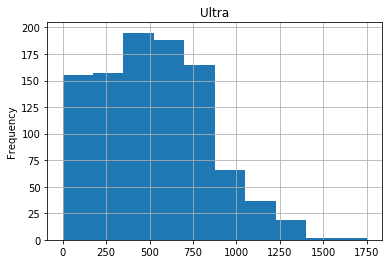

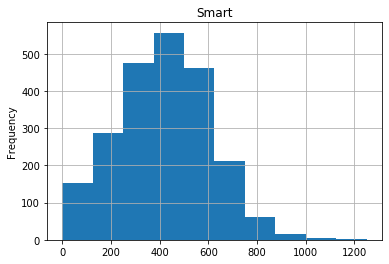

In [37]:
ultra_minutes = df_6.loc[df_6.loc[:,'tariff'] == 'ultra']['minutes']
smart_minutes = df_6.loc[df_6.loc[:,'tariff'] == 'smart']['minutes']
ultra_minutes.plot(y=ultra_minutes,title='Ultra', grid=True, kind='hist', bins=10, range=(0, 1750))
plt.show()
smart_minutes.plot(y=smart_minutes,title='Smart', grid=True, kind='hist', bins=10, range=(0, 1250))
plt.show()

Вывод: Гистограмма количества минут по тарифу 'Ультра' скошена вправо, датасет имеет положительную скошенность, Гистограмма количества минут по тарифу 'Смарт' скошена влево, датасет имеет отрицательную скошенность. Опять же это связано с тем, что в тарифе 'Ультра' больше минут для разговора без переплаты по абонентской плате.

7.5 Посчитал среднее значение сообщений по тарифам 'Смарт' и 'Ультра' методом mean().

In [38]:
mean_msg_ultra = df_6.loc[df_6.loc[:,'tariff'] == 'ultra']['messages'].mean()
mean_msg_smart = df_6.loc[df_6.loc[:,'tariff'] == 'smart']['messages'].mean()
print(mean_msg_ultra)
print(mean_msg_smart)

49.31338742393509
33.36905829596412


Вывод: Среднее значение отправленных сообщений в тарифе 'Ультра' больше чем в 'Смарт', это логично т.к в тариф 'Ультра' включено 1000 сообщений, а в 'Смарт' 50 сообщений, клиент в среднем старается не переплачивать.

7.6 Посчитал дисперсию сообщений тарифа smart и ultra. Применил метод var().

In [39]:
variance_msg_ultra = np.var(df_6.loc[df_6.loc[:,'tariff'] == 'ultra']['messages'])
variance_msg_smart = np.var(df_6.loc[df_6.loc[:,'tariff'] == 'smart']['messages'])
print(variance_msg_ultra)
print(variance_msg_smart)

2283.0995570851965
796.5978766916688


7.7 Посчитал стандартное отклонение сообщений тарифа smart и ultra. Применил метод std().

In [40]:
standard_deviation_msg_ultra = np.std(df_6.loc[df_6.loc[:,'tariff'] == 'ultra']['messages'])
standard_deviation_msg_smart = np.std(df_6.loc[df_6.loc[:,'tariff'] == 'smart']['messages'])
print(standard_deviation_msg_ultra)
print(standard_deviation_msg_smart)

47.781791061922284
28.224065559229217


Вывод: Разброс Сообщений в тарифах различается и это логично, т.к тариф 'Ультра' предоставляет больше сообщений, то и разброс больше чем у тарифа 'Смарт'. Картина аналогичная количеству минут.

7.8 Построил гистограммы распределения сообщений по тарифам ultra и smart.

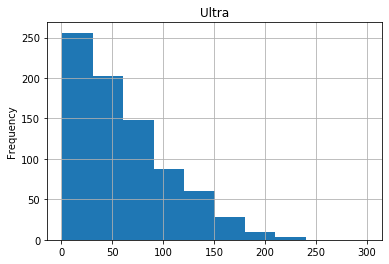

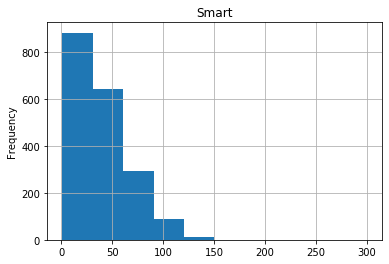

In [41]:
ultra_messages = df_6.loc[df_6.loc[:,'tariff'] == 'ultra']['messages']
smart_messages = df_6.loc[df_6.loc[:,'tariff'] == 'smart']['messages']
ultra_messages.plot(y=ultra_messages,title='Ultra', grid=True, kind='hist', bins=10, range=(1, 300))
plt.show()
smart_messages.plot(y=smart_messages,title='Smart', grid=True, kind='hist', bins=10, range=(1, 300))
plt.show()

Вывод: Гистограмма количества минут по тарифу 'Ультра' скошена влево, датасет имеет отрицательную скошенность, Гистограмма количества минут по тарифу 'Смарт' тоже скошена влево, датасет имеет отрицательную скошенность. В большинсте своем, по обоим тарифам люди часто отправляют до 50 сообщений в месяц. В тарифе 'Ультра' люди укладываются в предоставляемый тарифом лимит на сообщения, а в тарифе 'Смарт, уходят за лимит.

7.9 Посчитал среднее количество интернет-трафика тарифа smart и ultra. 

In [42]:
mean_gb_ultra = df_6.loc[df_6.loc[:,'tariff'] == 'ultra']['mb_used_month'].mean()
mean_gb_smart = df_6.loc[df_6.loc[:,'tariff'] == 'smart']['mb_used_month'].mean()
print(mean_gb_ultra)
print(mean_gb_smart)

19467.330628803247
16222.129596412557


7.10 Посчитал дисперсию интернет-трафика тарифа smart и ultra. Применил метод var().

In [43]:
variance_mb_ultra = np.var(df_6.loc[df_6.loc[:,'tariff'] == 'ultra']['mb_used_month'])
variance_mb_smart = np.var(df_6.loc[df_6.loc[:,'tariff'] == 'smart']['mb_used_month'])
print(variance_mb_ultra)
print(variance_mb_smart)

102115611.64930528
34634027.662576966


7.11 Посчитал стандартное отклонение интернет-трафика тарифа smart и ultra.Применил метод std().

In [44]:
standard_deviation_mb_ultra = np.std(df_6.loc[df_6.loc[:,'tariff'] == 'ultra']['mb_used_month'])
standard_deviation_mb_smart = np.std(df_6.loc[df_6.loc[:,'tariff'] == 'smart']['mb_used_month'])
print(standard_deviation_mb_ultra)
print(standard_deviation_mb_smart)

10105.226946947074
5885.0681952358855


Вывод: По интернет трафику картина анлогична минутам и сообщениям.

7.12 Построил гистограммы распределения интернет-трафика по тарифам ultra и smart.

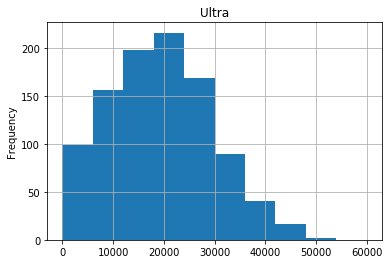

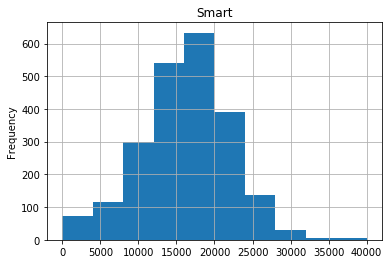

In [45]:
ultra_mb = df_6.loc[df_6.loc[:,'tariff'] == 'ultra']['mb_used_month']
smart_mb = df_6.loc[df_6.loc[:,'tariff'] == 'smart']['mb_used_month']
ultra_mb.plot(y=ultra_mb,title='Ultra', grid=True, kind='hist', bins=10, range=(0, 60000))
plt.show()
smart_mb.plot(y=smart_mb,title='Smart', grid=True, kind='hist', bins=10, range=(0, 40000))
plt.show()

Вывод:  Гистограмма интернет-трафика по тарифу 'Ультра' скошена влево, датасет имеет отрицательную скошенность, Гистограмма интернет-трафика по тарифу 'Смарт' тоже скошена влево, датасет имеет отрицательную скошенность. Пользователи тарифа 'Ультра' реже заходят за предел интернет-трафика нежели чем в тарифе 'Смарт'.

Вывод: Среднему значению отправленных сообщений в тарифе 'Ультра' далеко до 1000, похожая картина с минутами, среднему значению 542 минт далеко до 3000, в среднем и гигабайт используется 19 из 30. Средние показатели по тарифу 'Смарт' 419 минут из 500 минут, 39 сообщений из 50 сообщений, 16.2 гб из 15 гб, превышение имеет только показатель интернет-трафика.

### Проверка гипотез
<a id='cell4'></a>

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
* Пороговое значение alpha задайте самостоятельно.

Поясните:

* как вы формулировали нулевую и альтернативную гипотезы;
* какой критерий использовали для проверки гипотез и почему.

8.1 Посчитал среднюю выручку пользователей тарифов «Ультра» и «Смарт».

In [46]:
mean_ultra = df_6.loc[df_6.loc[:,'tariff'] == 'ultra']['total_pay'].mean()
mean_smart = df_6.loc[df_6.loc[:,'tariff'] == 'smart']['total_pay'].mean()
print(mean_ultra)
print(mean_smart)

2070.943204868154
1294.7488789237668


8.2 Посчитал среднюю выручку пользователей из Москвы и пользователей из других регионов.

In [47]:
mean_Moscow = df_6.loc[df_6.loc[:,'city'] == 'Москва']['total_pay'].mean()
mean_other_region = df_6.loc[df_6.loc[:,'city'] != 'Москва']['total_pay'].mean()

print(mean_Moscow)
print(mean_other_region)

1551.0310965630115
1528.4299424184262


8.3 Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применл метод scipy.stats.ttest_ind (array1, array2, equal_var)

In [48]:
#H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается.
#H1 - средняя выручка пользователей тарифов «Ультра» различается.

df_ultra = df_6.loc[df_6.loc[:,'tariff'] == 'ultra']['total_pay']
df_smart = df_6.loc[df_6.loc[:,'tariff'] == 'smart']['total_pay']


alpha = 0.05 # критический уровень статистической значимости
 
results = st.ttest_ind(df_smart, df_ultra, equal_var = False)
 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print(" Отвергаем нулевую гипотезу, cредняя выручка пользователей тарифов «Смарт» и «Ультра» различается.")
else:
    print("Не получилось отвергнуть нулевую гипотезу, cредняя выручка пользователей тарифов «Смарт» и «Ультра» не различается .")

p-значение: 2.800349849539667e-246
 Отвергаем нулевую гипотезу, cредняя выручка пользователей тарифов «Смарт» и «Ультра» различается.


8.4 Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применил метод scipy.stats.ttest_ind (array1, array2, equal_var)

In [49]:
#H0 - Cредняя выручка пользователей из Москвы тарифа «Ультра» не различается от выручки пользователей из других регионов.
#H1 - Cредняя выручка пользователей из Москвы тарифа «Ультра» различается от выручки пользователей из других регионов.

mean_Moscow = df_6.loc[df_6.loc[:,'city'] == 'Москва']['total_pay']
mean_other_region = df_6.loc[df_6.loc[:,'city'] != 'Москва']['total_pay']

alpha = 0.05 # критический уровень статистической значимости
 
results = st.ttest_ind(mean_Moscow, mean_other_region, equal_var = False)
 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print(" Отвергаем нулевую гипотезу, cредняя выручка пользователей в Москве отличается от выручки пользователей из других регионов.")
else:
    print("Не получилось отвергнуть нулевую гипотезу, cредняя выручка пользователей в Москве не отличается от выручки пользователей из других регионов.")

p-значение: 0.5105087040131013
Не получилось отвергнуть нулевую гипотезу, cредняя выручка пользователей в Москве не отличается от выручки пользователей из других регионов.


### Общий вывод
<a id='cell5'></a>

Средние показатели по абоненсткой плате тарифа «Ультра» не сильно превышают месячный платеж,а вот с тарифом «Cмарт» картина критичная, пользователи в среднем почти в три раза переплачивают месячную абоненсткую плату, часто переплата идет за интернет-трафик. Средняя выручка в Москве и в регионе почти одинаковая. 

* Средняя выручка больше по тарифу «Ультра».

 - средняя месячная выручка тарифа «Ультра» - 2070.943204868154
 - средняя месячная вручка тарифа «Смарт» - 1294.9282511210763

Если планируется активное использование интернет-трафика, долгие телефонные переговоры и отправка большого числа сообщений, то несомненно стоит выбрать тариф «Ультра».

Тем не менее, несмотря на все достоинства тарифа «Ультра», тариф «Смарт» приносит больше денег.

 - выручка тарифа «Ультра» - 2041950.0
 - выручка тарифа «Смарт» - 2887690.0

In [50]:
sum_ultra = df_6.loc[df_6.loc[:,'tariff'] == 'ultra']['total_pay'].sum()
sum_smart = df_6.loc[df_6.loc[:,'tariff'] == 'smart']['total_pay'].sum()
print(sum_ultra)
print(sum_smart)

2041950.0
2887290.0
